# In-class: Settling velocity

The first step is to import the modules so we have the tools we need to do the analysis.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'svg',}

## Grain settling

### Stokes Law

Grain settling is one of the most important problems in sedimentology (and therefore sedimentary geology), as neither sediment transport nor deposition can be understood and modeled without knowing what is the settling velocity of a particle of a certain grain size. Very small grains, when submerged in water, have a mass small enough that they reach a terminal velocity before any turbulence develops. This is true for clay- and silt-sized particles settling in water, and for these grain size classes Stokes’ Law can be used to calculate the settling velocity as we worked out on the board in class:

\begin{equation}
settling\_velocity = C_1 \times \frac{D^2(\rho_{grain} - \rho_{fluid})g}{\mu}
\end{equation}

In this equation $(\rho_{grain} - \rho_{fluid})$ is the density difference between the particle and fluid, $g$ is gravitational acceleration, $D$ is the particle diameter, $C_1$ is a constant with a theoretical value of 1/18, and the $\mu$ is the fluid viscosity.

A function can be written that accepts the variables of grain diameter, grain density, fluid density and fluid viscosity and returns the settling velocity as predicted by Stokes Law:

In [6]:
def velocity_stokes(grain_diameter,grain_density,fluid_density,fluid_viscosity):
    """
    This function calculates the settling velocity of a grain in a fluid as
    predicted by Stokes law.
    
    Inputs
    ------
    particle_diameter: diameter of sediment grain with units of meters
    particle_density: density of sediment grain with units of kg/m3
    fluid_density: density of fluid in which grain is sinking with units of kg/m3
    fluid_viscosity: dynamic viscosity of fluid with units of Pa*s
    
    Output
    ------
    settling velocity in meters/second
    """
    g = 9.81 #gravitational acceleration
    constant1 = 1/18
    velocity = constant1*((grain_diameter**2)*(grain_density-fluid_density)*g)/(fluid_viscosity)
    return velocity  

A couple things to note about the function above. In Python: + is addition, / is division, \* is multiplication and \*\* is exponentiation. So 3\*3=9, while 3\*\*3=27. You will need to use this operators when you write your own functions below.

Now that we have a function for Stokes law, let's use it to predict the settling velocity for a fine grain of sand sinking in water. First we need to define the variables that will be input to the function.

In [7]:
fine_sand_grain = .00013 # 0.130 mm grain diameter in meters
quartz_density = 2650.0 # density of particle in kg/m3
water_density = 1000.0 # density of water in kg/m3
water_viscosity = 1.002*1E-3 # dynamic viscosity in Pa*s at 20 C

Now that these variables have been assigned values, we can feed these values into the velocity_stokes function and the resulting output will be the predicted Stokes settling velocity in meters/second.

Note that the order of input arguments matter!

In [8]:
velocity_stokes(fine_sand_grain,quartz_density,water_density,water_viscosity)

0.01516699101796407

## Plot Stokes settling

Let's make a plot of grain diameter versus settling velocity as predicted by Stokes Law. To make such a plot of a function it can be quite helpful to make a long list with different values of the variable you are seeking to evaluate the function for. Let's use the `np.arange()` function to develop a list of sediment diameters between 0 and 0.01 meters with 0.00001 between each sediment diameter. Doing so will give us 1000 different sediment grain diameters that we can feed into our settling functions. Writing `print(diameters)` will print all 1000 of them.

In [12]:
diameters = np.arange(0,0.01,0.00001)

Previously we input a single grain diameter into the `stokes_velocities()` function, but we can instead enter all 1000 diameters that are now listed within the `diameters` variable.

In [13]:
stokes_velocities = velocity_stokes(diameters,quartz_density,water_density,water_viscosity)

Armed with these 1000 calculated settling velocities, we can make a nice plot of settling velocity as a function of grain size. Let's make a plot that has grain size divisions and labels on it and then plot on the calculated Stokes settling values using `plt.plot()`. Note that I am multiplying the diameters by 1000 so that they x-axis is in millimeters instead of meters.

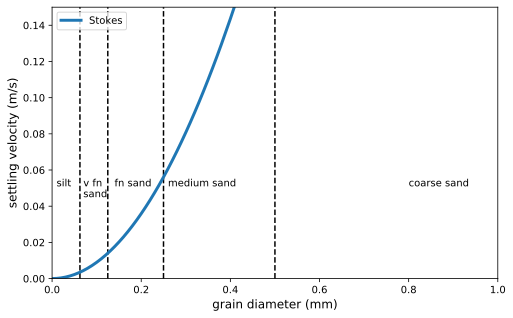

In [11]:
#make a figure and set its size
plt.figure(figsize=(8,5))

#plotting the vertical lines that demarcate grain size
plt.text(0.01, 0.051, 'silt', fontsize=10)
plt.plot([0.25/4, 0.25/4],[0, 0.15],'k--') #'k--' means dashed line in black
plt.text(0.07, 0.051, 'v fn', fontsize=10)
plt.text(0.07, 0.045, 'sand', fontsize=10)
plt.plot([0.25/2, 0.25/2],[0, 0.15],'k--')
plt.text(0.14, 0.051, 'fn sand', fontsize=10)
plt.plot([0.25, 0.25],[0, 0.15],'k--')
plt.plot([0.5, 0.5],[0.00001, 10],'k--')
plt.text(0.26, 0.051, 'medium sand', fontsize=10)
plt.text(0.8, 0.051, 'coarse sand', fontsize=10)

#plotting a line of the calculated stokes_velocities
plt.plot(diameters*1000,stokes_velocities,label='Stokes',linewidth=3)

#labeling and setting the axis limits and making a legend
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,1,0,0.15]);
plt.legend(loc=2)
plt.show()

## Plot your settling data

AS you conducted your experiments, add your data to a .csv file and enter it into the list below so that you can plot your data.

In [16]:
sand_diameters = [0.3, 0.2] #replace these values with your sand data
sand_velocities = [0.04, 0.03] #replace these values with your sand data

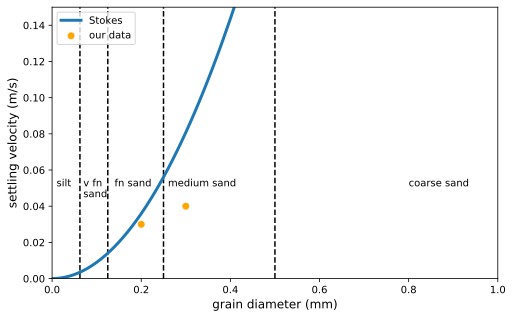

In [17]:
#make a figure and set its size
plt.figure(figsize=(8,5))

#plotting the vertical lines that demarcate grain size
plt.text(0.01, 0.051, 'silt', fontsize=10)
plt.plot([0.25/4, 0.25/4],[0, 0.15],'k--') #'k--' means dashed line in black
plt.text(0.07, 0.051, 'v fn', fontsize=10)
plt.text(0.07, 0.045, 'sand', fontsize=10)
plt.plot([0.25/2, 0.25/2],[0, 0.15],'k--')
plt.text(0.14, 0.051, 'fn sand', fontsize=10)
plt.plot([0.25, 0.25],[0, 0.15],'k--')
plt.plot([0.5, 0.5],[0.00001, 10],'k--')
plt.text(0.26, 0.051, 'medium sand', fontsize=10)
plt.text(0.8, 0.051, 'coarse sand', fontsize=10)

#plotting a line of the calculated stokes_velocities
plt.plot(diameters*1000,stokes_velocities,label='Stokes',linewidth=3)
plt.scatter(sand_diameters,sand_velocities,label='our data',c='orange')


#labeling and setting the axis limits and making a legend
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,1,0,0.15]);
plt.legend(loc=2)
plt.show()

## Plot our class data along with the Stokes Law prediction

Let's plot our data from class on the same plot. To do that we need to import the .csv file that has all of our data in it. A nice way to import and deal with data in Python is to use the Pandas function `pd.read_csv()` which imports data from a file into a tabular data structure called a dataframe. **To import the data, you need to have the class_data.csv in the same folder as your notebook.** In the code cell below, the data is read in from the .csv files and named class_data. Having the next line be `class_data` then prints the dataframe to the notebook so we can see all of the data.

In [ ]:
class_data = pd.read_csv('class_settling_data_2020.csv')
class_data

In order to access data from the class_data dataframe one column at a time we can use this notation `class_data['diameter (mm)']` where the text in quotes within the square brackets is the name of the column.

Now we have a way to access the clast diameter and settling velocity data we collected. Let's set variables equal to these columns:

In [ ]:
our_diameters = class_data['diameter (mm)']
our_velocities = class_data['velocity (m/s)']

Let's plot these data along with Stoke's law line. Given that our data covers a large range of grain sizes and settling velocities, let's plot them on a loglog plot using the `plt.loglog()` function which makes it so the axes have a logarithmic rather than linear scale.

In [ ]:
plt.figure(figsize=(8,7))

#a plot with loglog axes showing the calculated stokes values
plt.loglog(diameters*1000,stokes_velocities,label='Stokes',color='blue',linewidth=3)

#make a scatter plot of our data on the same figure
plt.scatter(our_diameters,our_velocities,s=40,marker='o',color='goldenrod',label='our data')

plt.plot([1.0/64, 1.0/64],[0.00001, 10],'k--')
plt.text(0.012, 0.005, 'fine silt', fontsize=13,
    rotation='vertical')
plt.plot([1.0/32, 1.0/32],[0.00001, 10],'k--')
plt.text(0.17/8, 0.005, 'medium silt', fontsize=13,
    rotation='vertical')
plt.plot([1.0/16, 1.0/16],[0.00001, 10],'k--')
plt.text(0.17/4, 0.005, 'coarse silt', fontsize=13,
    rotation='vertical')
plt.plot([1.0/8, 1.0/8],[0.00001, 10],'k--')
plt.text(0.17/2, 0.005, 'very fine sand', fontsize=13,
    rotation='vertical')
plt.plot([0.25, 0.25],[0.00001, 10],'k--')
plt.text(0.17, 0.005, 'fine sand', fontsize=13,
    rotation='vertical')
plt.plot([0.5, 0.5],[0.00001, 10],'k--')
plt.text(0.33, 0.005, 'medium sand', fontsize=13,
    rotation='vertical')
plt.plot([1, 1],[0.00001, 10],'k--')
plt.text(0.7, 0.005, 'coarse sand', fontsize=13,
    rotation='vertical')
plt.plot([2, 2],[0.00001, 10],'k--')
plt.text(1.3, 0.005, 'very coarse sand', fontsize=13,
    rotation='vertical')
plt.plot([4, 4],[0.00001, 10],'k--')
plt.text(2.7, 0.005, 'granules', fontsize=13,
    rotation='vertical')
plt.text(6, 0.005, 'pebbles', fontsize=13,
    rotation='vertical')
plt.xlabel('grain diameter (mm)', fontsize=15)
plt.ylabel('settling velocity (m/s)', fontsize=15)
plt.axis([0.01,10,0.0001,10])

plt.legend(loc=2)
plt.show()